In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
warnings.filterwarnings("ignore")

In [2]:
d= pd.read_csv(r'D:\python rawdata\baseball.csv')
d

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# data cleaning

In [3]:
d.drop(["AB",'2B','H','3B','HR','BB','SO','SB','SHO','SV'],axis=1,inplace=True)

In [4]:
d.isnull().sum()

W      0
R      0
RA     0
ER     0
ERA    0
CG     0
E      0
dtype: int64

In [5]:
d.dtypes

W        int64
R        int64
RA       int64
ER       int64
ERA    float64
CG       int64
E        int64
dtype: object

In [6]:
d.columns

Index(['W', 'R', 'RA', 'ER', 'ERA', 'CG', 'E'], dtype='object')

<AxesSubplot:>

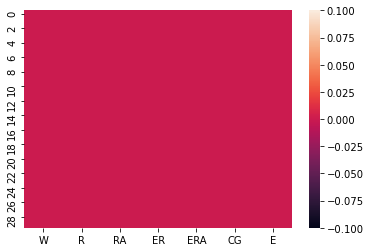

In [7]:
#to observe if any table has missing data or not
sns.heatmap(d.isnull())

observation- no null valus are present

In [8]:
d.describe()

,W,R,RA,ER,ERA,CG,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,688.233333,635.833333,3.956333,3.466667,94.333333
std,10.453455,58.761754,72.108005,70.140786,0.454089,2.763473,13.958889
min,63.000000,573.000000,525.000000,478.000000,2.940000,0.000000,75.000000
25%,74.000000,651.250000,636.250000,587.250000,3.682500,1.000000,86.000000
50%,81.000000,689.000000,695.500000,644.500000,4.025000,3.000000,91.000000
75%,87.750000,718.250000,732.500000,679.250000,4.220000,5.750000,96.750000
max,100.000000,891.000000,844.000000,799.000000,5.040000,11.000000,126.000000


In [9]:
d.corr()

,W,R,RA,ER,ERA,CG,E
W,1.000000,0.430751,-0.812952,-0.809435,-0.819600,0.080533,-0.089485
R,0.430751,1.000000,-0.041623,-0.041245,-0.049281,0.232042,-0.023262
RA,-0.812952,-0.041623,1.000000,0.991018,0.986674,-0.016659,0.198996
ER,-0.809435,-0.041245,0.991018,1.000000,0.997248,-0.020221,0.136921
ERA,-0.819600,-0.049281,0.986674,0.997248,1.000000,-0.009856,0.113137
CG,0.080533,0.232042,-0.016659,-0.020221,-0.009856,1.000000,-0.140047
E,-0.089485,-0.023262,0.198996,0.136921,0.113137,-0.140047,1.000000


<AxesSubplot:>

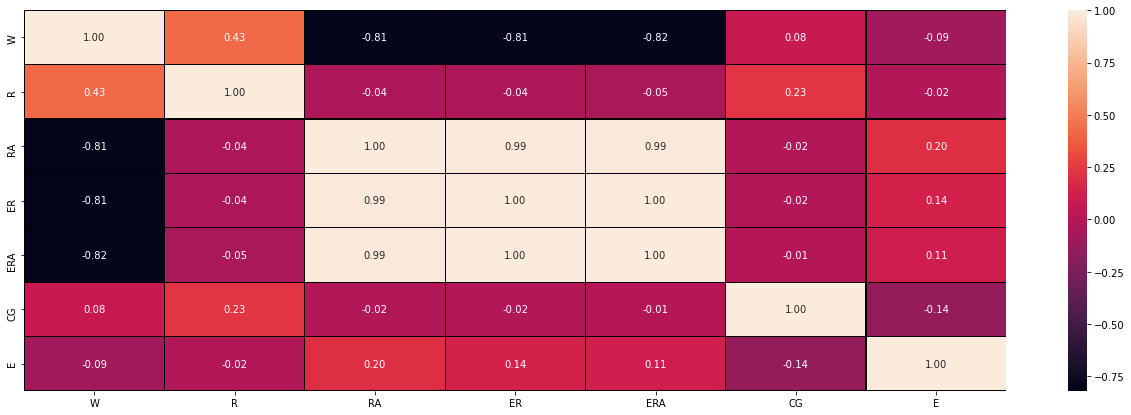

In [10]:
plt.figure(figsize=(22,7))
sns.heatmap(d.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

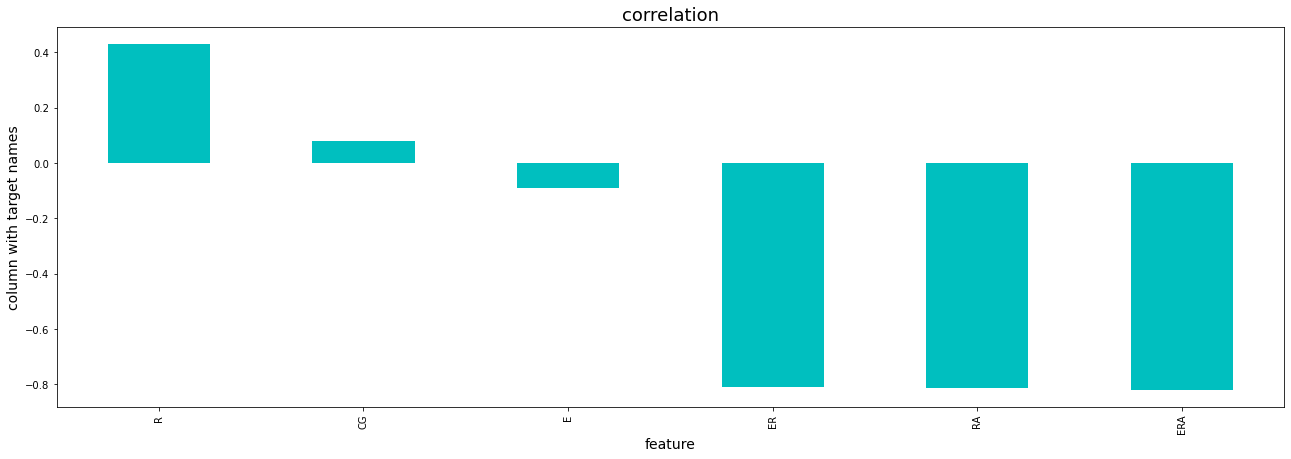

In [11]:
#checkng the columns which are,either positively or negatively, correlated with target column
plt.figure(figsize=(22,7))
d.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel("feature",fontsize=14)
plt.ylabel("column with target names",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

In [12]:
d.skew()

W      0.047089
R      1.200786
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
E      0.890132
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

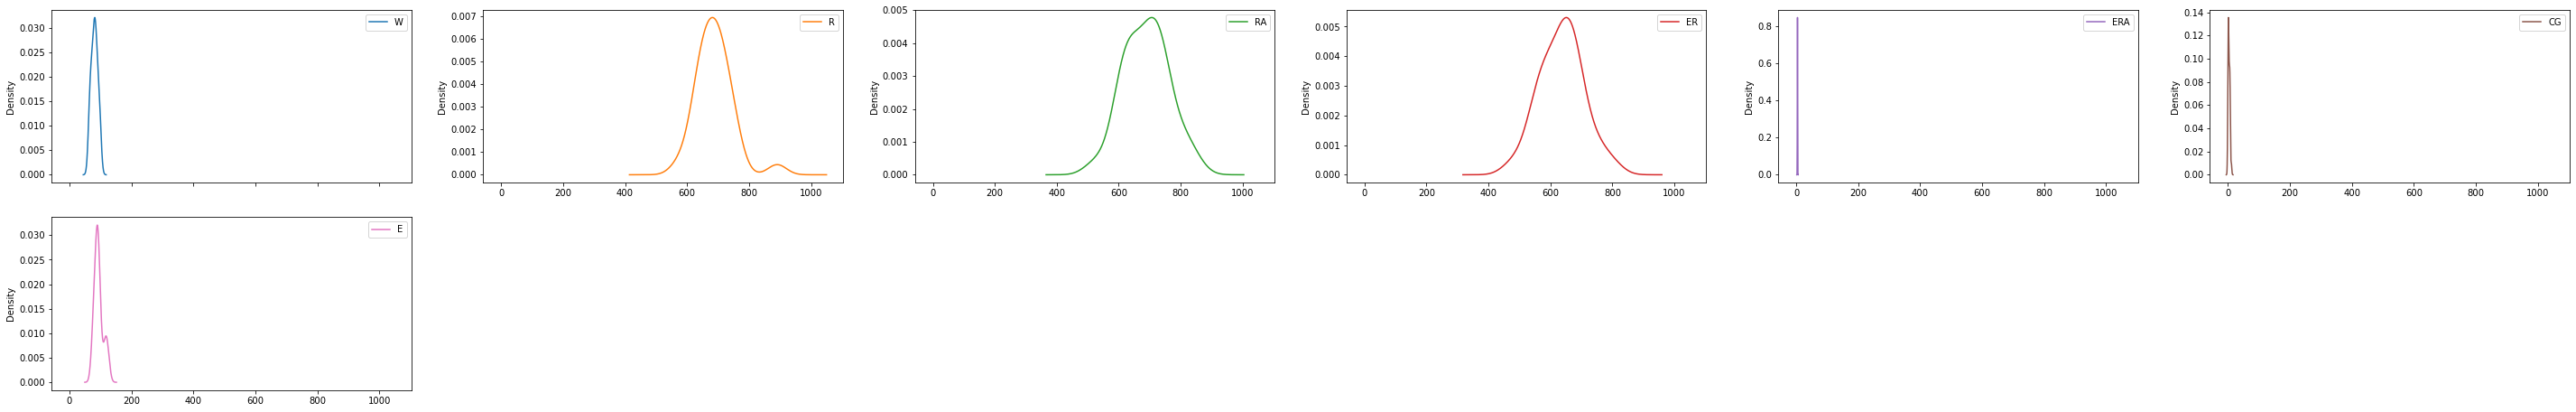

In [13]:
d.plot(kind="kde",subplots=True,layout=(12,6),figsize=(50,50))

<AxesSubplot:>

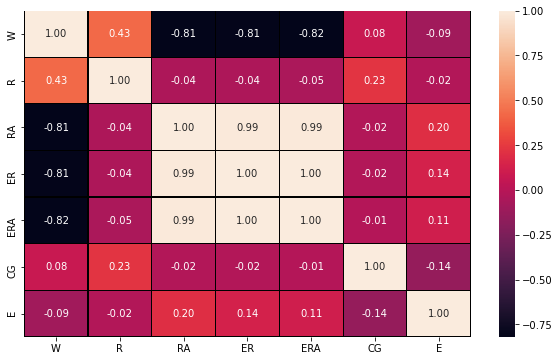

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(d.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [15]:
d.drop("CG",axis=1)

,W,R,RA,ER,ERA,E
0,95,724,641,601,3.73,88
1,83,696,700,653,4.07,86
2,81,669,640,584,3.67,79
3,76,622,701,643,3.98,101
4,74,689,803,746,4.64,86
5,93,891,670,609,3.80,88
6,87,764,698,652,4.03,93
7,81,713,693,646,4.05,77
8,80,644,642,604,3.74,95
9,78,748,753,694,4.31,97


# checking outliers

W         AxesSubplot(0.125,0.826831;0.110714x0.053169)
R      AxesSubplot(0.257857,0.826831;0.110714x0.053169)
RA     AxesSubplot(0.390714,0.826831;0.110714x0.053169)
ER     AxesSubplot(0.523571,0.826831;0.110714x0.053169)
ERA    AxesSubplot(0.656429,0.826831;0.110714x0.053169)
CG     AxesSubplot(0.789286,0.826831;0.110714x0.053169)
E         AxesSubplot(0.125,0.763028;0.110714x0.053169)
dtype: object

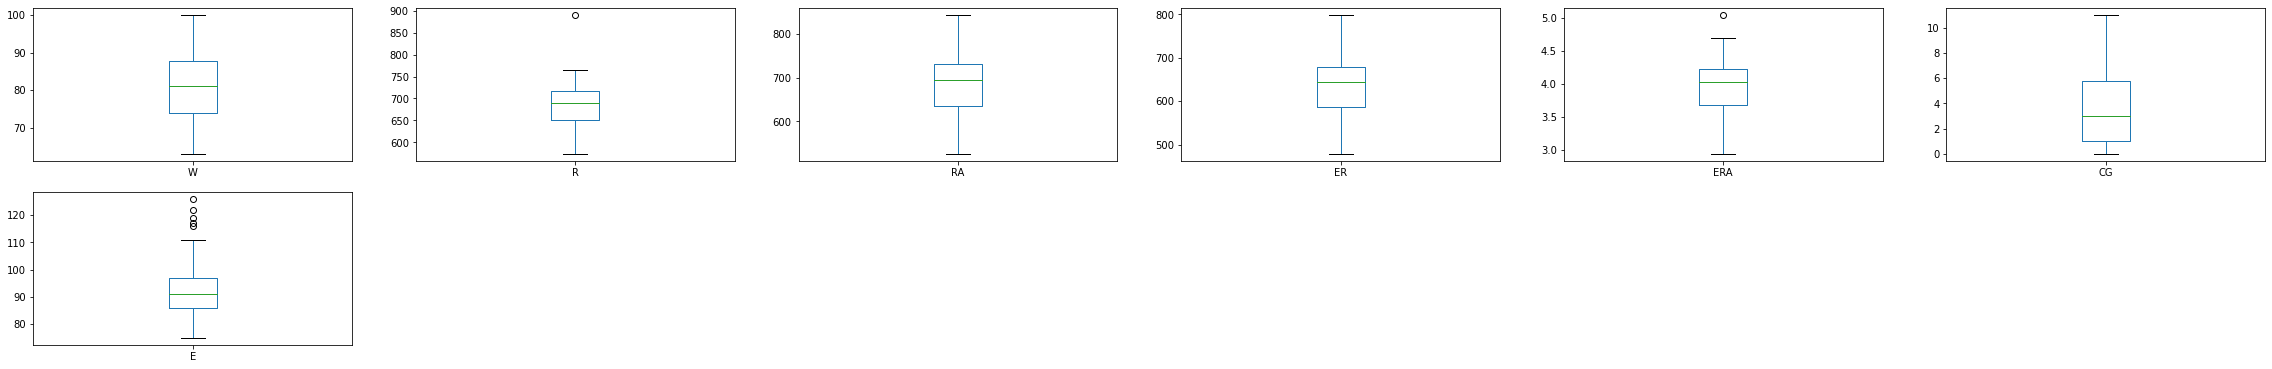

In [16]:
d.plot(kind="box",subplots=True,layout=(12,6),figsize=(40,40))

# Removing outliers

In [17]:
import numpy as np
import scipy
from scipy.stats import zscore
z=np.abs(zscore(d))
z

array([[1.36540860e+00, 6.19077968e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 1.80075931e-01, 1.03922169e-01,
        5.30100415e-02, 1.30044220e+00, 4.85757510e-01],
       [6.77839422e-01, 1.32700776e-02, 1.61880269e+00, 1.59750126e+00,
        1.53131824e+00, 1.30044220e+00, 6.07196888e-01],
       [1.17081355e+00, 3.50964704e+00, 2.57184162e-01, 3.89103937e-01,
        3.50164922e-01, 1.30044220e+00, 4.61469635e-01],
       [5.87028399e-01, 1.31142984e+00, 1.37760438e-01, 2.34429080e-01,
        1.65003087e-01, 1.71756517e-01, 9.71515020e-02],
       [3.24325082e-03, 4.28681202e-01, 6.72346164e-02, 1.47424473e-01,
        2.09800305e-01, 1

In [18]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [19]:
d1=d[(z<3).all(axis=1)]
d1

,W,R,RA,ER,ERA,CG,E
0,95,724,641,601,3.73,2,88
1,83,696,700,653,4.07,2,86
2,81,669,640,584,3.67,11,79
3,76,622,701,643,3.98,7,101
4,74,689,803,746,4.64,7,86
6,87,764,698,652,4.03,3,93
7,81,713,693,646,4.05,0,77
8,80,644,642,604,3.74,1,95
9,78,748,753,694,4.31,3,97
10,88,751,733,680,4.24,5,119


In [20]:
d.shape

(30, 7)

In [21]:
d1.shape

(29, 7)

# dividing data in features and vectors-

In [22]:
#independent feature
x=d1.drop("W",axis=1)

#dependent feature
y=d1["W"]

In [23]:
x.shape

(29, 6)

In [24]:
x.shape[1]

6

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

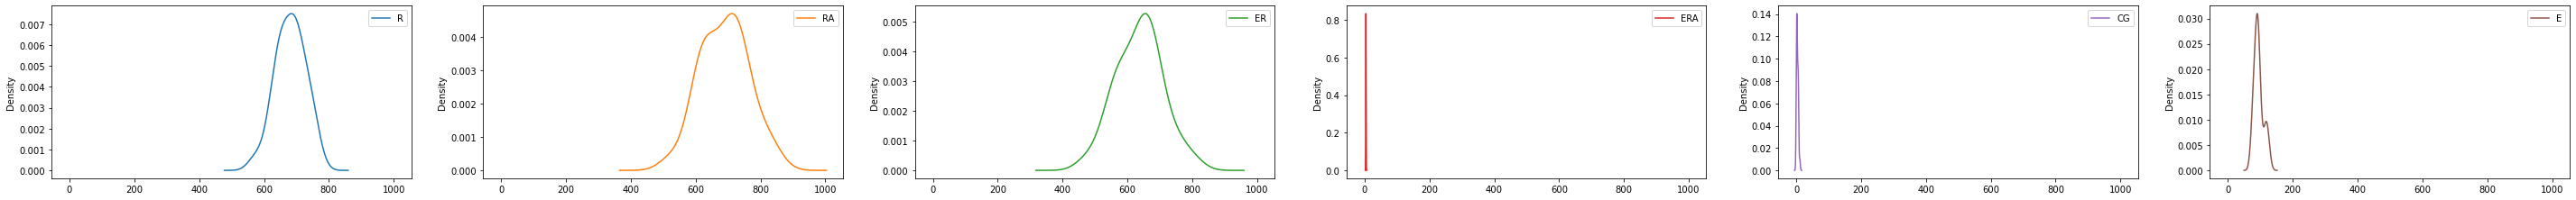

In [25]:
x.plot(kind="kde",subplots=True,layout=(12,6),figsize=(50,50))

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# multicollinearity

In [27]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["FEATURES"]= x.columns
    print(vif)

In [28]:
vif_calc()

     VIF FACTOR FEATURES
0     95.848204        R
1   7080.166210       RA
2  26568.559309       ER
3  16875.294551      ERA
4      2.680898       CG
5     69.560329        E


In [29]:
x=x.drop("ER",axis=1)

In [30]:
vif_calc()

    VIF FACTOR FEATURES
0    83.702617        R
1  4862.386544       RA
2  4054.588270      ERA
3     2.626420       CG
4    69.195693        E


In [31]:
x.shape

(29, 5)

In [32]:
y.shape

(29,)

# Linear Regression model

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score

In [34]:
x.head()

,R,RA,ERA,CG,E
0,724,641,3.73,2,88
1,696,700,4.07,2,86
2,669,640,3.67,11,79
3,622,701,3.98,7,101
4,689,803,4.64,7,86


In [35]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
lm.fit(x_train,y_train)

LinearRegression()

In [37]:
lm.coef_

array([ 8.45079782e-02,  1.70187373e-02, -2.04560392e+01, -1.50092385e-01,
       -9.19238442e-03])

In [38]:
lm.intercept_

93.56245859568219

In [39]:
#predicting the value
pred=lm.predict(x_test)
print("Wins",pred)

Wins [76.27234944 91.48264727 74.49353419 63.43104596 80.08206822 80.92472292
 73.96346206 88.24510473 82.95952691 78.02095044]


In [40]:
pred.shape

(10,)

In [41]:
dframe=pd.DataFrame(y_test,pred)

In [42]:
dfr=pd.DataFrame({"Actual wins":y_test,"Predicted wins":pred})
dfr

,Actual wins,Predicted wins
28,74,76.272349
17,97,91.482647
13,76,74.493534
23,67,63.431046
9,78,80.082068
10,88,80.924723
22,71,73.963462
0,95,88.245105
27,79,82.959527
14,68,78.020950


In [43]:
lm.score(x_train,y_train)

0.873678409522373

In [44]:
import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [45]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,pred))

Mean Absolute Error: 4.572130200603165


In [46]:
print("mean_squared_error:",metrics.mean_squared_error(y_test,pred))

mean_squared_error: 27.55141977421173


In [47]:
print("Root mean_squared_error:",math.sqrt(metrics.mean_squared_error(y_test,pred)))

Root mean_squared_error: 5.24894463432524


<AxesSubplot:>

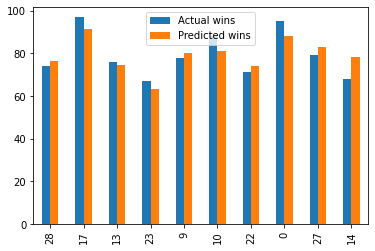

In [48]:
dfr.plot(kind="bar")

<AxesSubplot:ylabel='Density'>

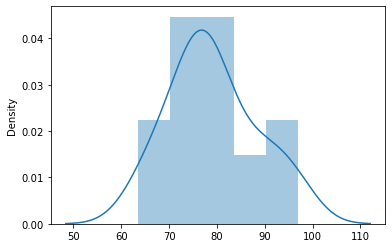

In [49]:
sns.distplot(dfr)

In [50]:
#r2 score is the proportion of the variance in the dependable variable that is predictable on the basis of independent variable
#it shows the change coming in y whenever x is being changed
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7309694387832074


# prediction

In [51]:
#now trying to predict the values
t=np.array([790,650,4,3,90])

In [52]:
t=t.reshape(1,-1)
t.shape

(1, 5)

In [53]:
lm.predict(t)

array([88.28419219])

# Tuning the model: hyperparameter tunig:GridSearchCV

In [54]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
alphavalue={"alpha":[1,0.1,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0001, 0]})

In [55]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.45469537298100066
1
{'alpha': 1}


In [56]:
alphavalue={"alpha":[1,0.1,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)


0.46221666751637314
1
{'alpha': 1}


# Regularization

In [57]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

rdg=Ridge(alpha=1,random_state=45)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)


0.8628629058106315

In [58]:
rdg.coef_

array([ 0.08315141, -0.10751462, -1.10216918, -0.10035813,  0.05793013])

In [59]:
pred1=rdg.predict(x_test)
pred

array([76.27234944, 91.48264727, 74.49353419, 63.43104596, 80.08206822,
       80.92472292, 73.96346206, 88.24510473, 82.95952691, 78.02095044])

In [60]:
r2_score(pred,y_test)

0.5065176379294578

In [61]:
las=Lasso(alpha=1,random_state=45)
las.fit(x_train,y_train)
las.score(x_train,y_train)


0.86091450352317

In [62]:
las.coef_

array([ 0.08250497, -0.11465561, -0.        , -0.        ,  0.06632501])

In [63]:
pred1=rdg.predict(x_test)
pred1

array([73.0767806 , 90.94744971, 73.65017993, 62.88692723, 78.70675425,
       82.25739945, 75.00701148, 88.97100337, 80.54017021, 78.4635554 ])

In [64]:
r2_score(pred1,y_test)

0.5645952639462855

# Approaching More Regressors

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [66]:
dtr=DecisionTreeRegressor(criterion="mse")
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [67]:
dtrpred=dtr.predict(x_test)
dtrpred

array([68., 98., 74., 64., 68., 68., 81., 86., 68., 68.])

In [68]:
r2_score(dtrpred,y_test)

0.18710046751264187

In [69]:
print("mean_squared_error:",metrics.mean_squared_error(y_test,dtrpred))
print("Root mean_squared_error:",math.sqrt(metrics.mean_squared_error(y_test,dtrpred)))

mean_squared_error: 85.2
Root mean_squared_error: 9.23038460737146


In [70]:
KNr=KNeighborsRegressor()
KNr.fit(x_train,y_train)
KNr.score(x_train,y_train)

0.7730876855708642

In [71]:
KNrpred=KNr.predict(x_test)
KNrpred

array([75.2, 89.4, 75.2, 71.2, 78.6, 78.6, 77.2, 84.8, 80.8, 76.2])

In [72]:
r2_score(KNrpred,y_test)

-0.545220396452792

In [73]:
print("mean_squared_error:",metrics.mean_squared_error(y_test,KNrpred))
print("Root mean_squared_error:",math.sqrt(metrics.mean_squared_error(y_test,KNrpred)))

mean_squared_error: 37.916000000000025
Root mean_squared_error: 6.157596933869578


In [74]:
list=["linear",'poly','rbf']
for l in list:
    svr1=SVR(kernel=l)
    

    svr1.fit(x_train,y_train)
    print("svr score of",l,"is:")
    print(svr1.score(x_train,y_train))
    

svr score of linear is:
0.8430288996199389
svr score of poly is:
0.37457384471952215
svr score of rbf is:
0.025673666132984718
